# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.2.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3
import warnings

warnings.filterwarnings("ignore")
#Libraries to help in reading and manipulating of data
import pandas as pd
import numpy as np

#Libraries to help data plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to split the data
from sklearn.model_selection import train_test_split

#Libraries to remove the limits of the displayed columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

#Libraries for DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#Libraries for different ensemble classifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier
from xgboost import XGBClassifier

#Libraries to calculate different metric scores
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
#Libraries to tune different models
from sklearn.model_selection import GridSearchCV




**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Importing DataSets

In [2]:
data = pd.read_csv('/content/EasyVisa.csv') # Code to read the dataset into google colab
df = data.copy()  # Code to make a copy of the data

## Data Overview

- Observations
- Sanity checks

In [3]:
df.head()  # Code to check the first 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
df.tail()  # Code to determine the bottom 5 rows in the dataset

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


## Observation
#### It will be observed that the data was structured properly and it contains both numerical and categorical variables. In the section following, further analysis will be performed to derive greater understanding of the data

In [5]:
df.shape  # code to determine the number of rows and columns in the data

(25480, 12)

## Observation
#### The dataset contains 25,480 rows and 12 columns

In [6]:
df.info()   # Code to determine the datatypes and the memory usage of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Observation
#### The dataset contain only columns (no_of_employees and  yr_of_estab) that are of the integer datatype and one column (prevailing_wage) that is of the float datatype. The restof the columns are of the object datatype (categorical).

#### Also, it should be noted that there are no missing values across all the columns and the dataset used about 2.3 MB of memory.

## Checking the statistical summary of the dataset

In [9]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observation
#### The case_id column is a unique identifier and will have to be dropped later for modeling purposes since it does not provide any meaningful insight.

#### The Asia continent has the highest number of foreign workers application with approximately 17,000 applications.

#### Applicants with Bachelor degree have the highest number of applications with over 10,000 that applied.

#### Over 14,000 of applicants have the requisite job experiences and also a very large number of the applicants (over 22,000) do not require job training.

#### The average number of employees in a company is about 5,668 while the median is about 2109. A large difference exist between the 75th percentile and the maximum number of employees which suggest that lots of outliers exist and hence the distribution will be skewed to the right. Also the minimum number of employee was found to be -26 which is quite abnormal since there is nothing like negative number of employee, except it probably mean employees leaving the organization. However, further checks needs to be made on this.

#### The Northeast region seem to have the highest number of applicants (7,195) suggesting that more companies are located in that region.

#### The average wage was 74,455 dollars while the median wage was 70, 308 dollars which suggest that the distribution will be close to normal. The minimum and maximum wages ranges between 2 dollars (per hour) to about 319, 210 dollars per annum.

#### The majority of the wages were made per annum (22,962) while only few were done hourly, weekly or monthly.

#### Applicants with full time position had the highest number (22,773).

#### Among all the applicants, about 17,000 were certified which implies that over 60% of the applicants succeeded in getting certified.


## Checking for duplicates and missing data

In [11]:
df.duplicated().sum()   # Code to check the presence of duplicate rows in the data

0

## Observation
#### No duplicate rows in the data

In [12]:
df.isnull().sum()   # Code to check the presence of missing values in the data

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


## Observation
#### There are no missing data across all the columns in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Fixing the negative value in the number of employees

In [14]:
df.loc[df['no_of_employees'] < 0].shape   #Code to determine the number of entries with negative value of number of employees.

(33, 12)

## Observation
#### There are 33 entries where the number of employees had a negative value. This will probably be a mistake during the data entry. Hence, the negative values will have to be converted to positive values by taking the absolute values.

In [15]:
df['no_of_employees'] = abs(df['no_of_employees'])   # Code to determine the absolute values of the number of employees.

#### Lets check if the negative values have been converted to positive values.

In [16]:
df.loc[df['no_of_employees'] < 0].shape

(0, 12)

## Observation
#### There are no rows or entries with negative value for the number of employee.

## checking the count of each unique category in each of the categorical variables

In [3]:
# Code to drop the case_id column since it is a unique identifier
df.drop('case_id', axis = 1, inplace = True)

In [16]:

# Code to make a list of all categorical variables
cat_col = list(df.select_dtypes ('object').columns)

# code to print the number of count for each unique categorical variable.

for i in cat_col:
  print(df[i].value_counts(normalize = True))

continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
region_of_employment
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: proportion, dtype: float64
unit_of_wage
Year     0.901177
Hour     0.084655
Week     0.010675
Month    0.003493
Name: proportion, dtype: float64
full_time_position
Y    0.89376
N    0.10624
Name: proportion, dtype: float64
case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64


## Observation
####  It should be noted that the Asian continent accounts for the highest number of visa application with over 66% of the total while applicants from the Oceania continent accounts for the least with less than 1% of the total.

#### Applicants with Bachelors degree accounts for the highest number of visa application with about 40% closely followed with those with Masters degree (about 37%). Applicants with Doctorate degree accouns for the lowest application with about 9% of the total.

#### About 58% of the visa applicants have the required job experience while only about 11% of applicant would required job training. So apparently, the majority of the applicants do not require job training and they could immediately start contributing to the company as soon as they are employed and the company do not have to spend heavily on manpower training.

#### The Northeast region seem to be the most attrative region for most of the applicants account for about 28% probably due to the presence of large number of companies and job opportunities there. It is closely followed by the South and the West regions with 27.5% and 25.8% respectively. The least region is the Island region with about   1.5% of applicants.

#### The unit of wage is yearly accounting for over 90% of all entries while the least is the monthly accounting for less than 1%.

#### Employees on fulltime positions accounts for the highest number of applicants with over 89% of the total application.

#### Over 66% of applicants were certified.


## Univariate Analysis

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Distribution of the number of employees

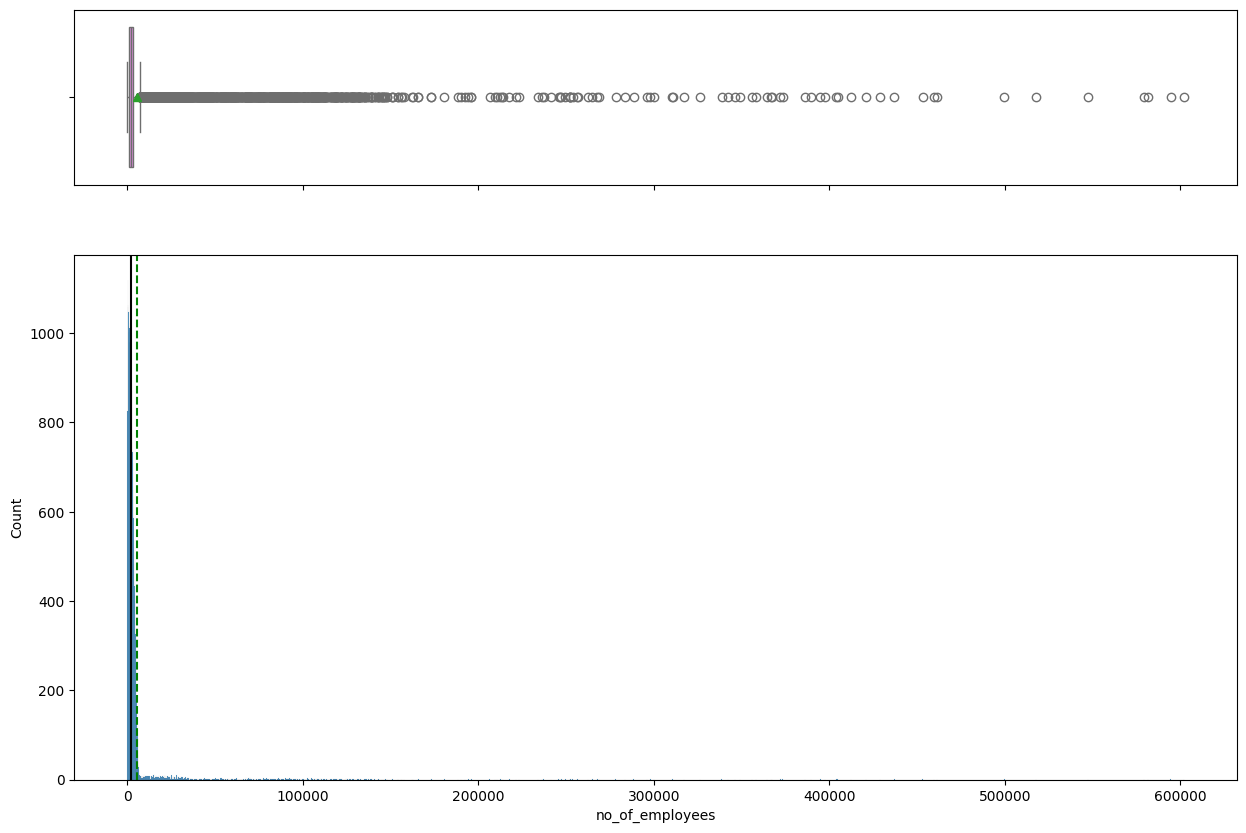

In [26]:
histogram_boxplot(df, "no_of_employees")


## Observation
#### The number of employees contains lots of outliers and the distribution is highly skewed to the right.

## Checking the distribution of the prevailing wage

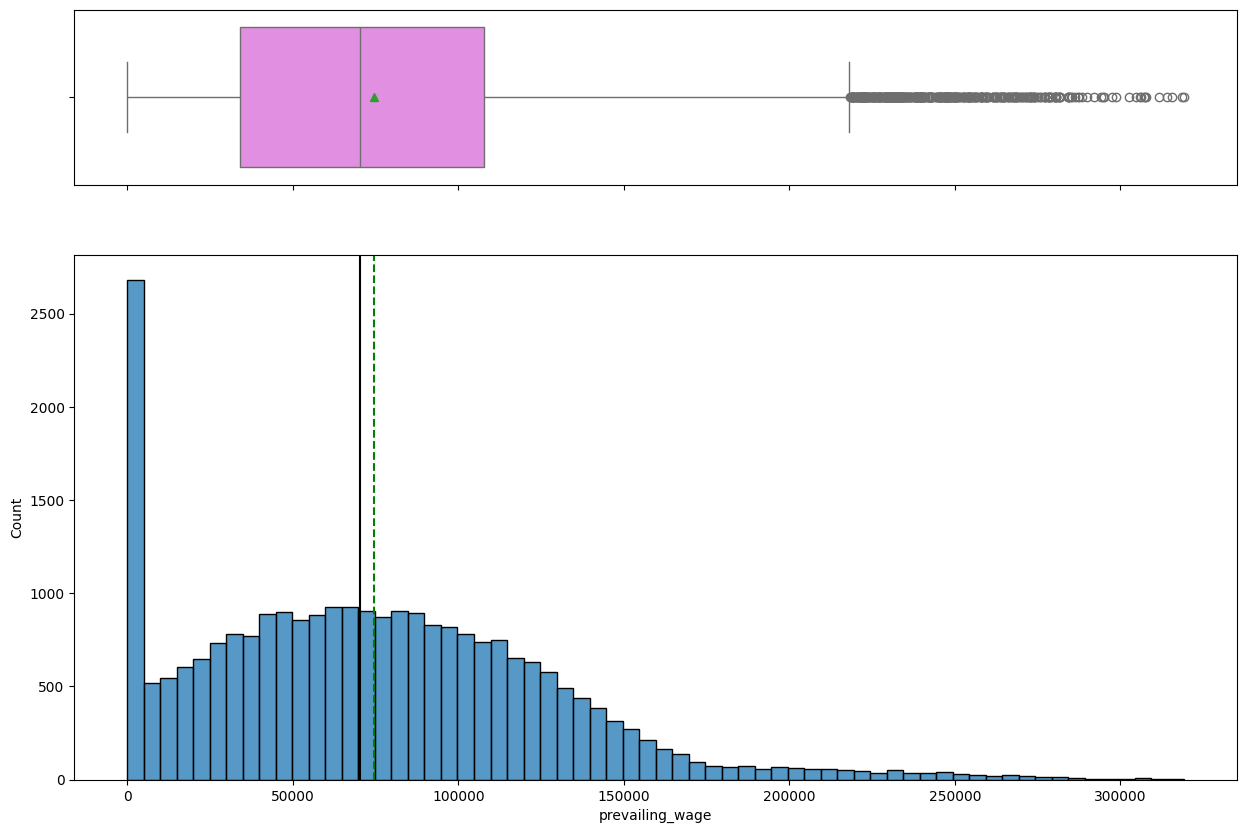

In [27]:
histogram_boxplot(df,'prevailing_wage') ##  code to create histogram_boxplot for prevailing wage

## Observation
#### The distribution for the prevailing wage has a dome-shape which resembles the normal distribution, however tghe left tail was missing and the right tail was exceptionally long. Also,the lowest wage which is close to zero had the highest count and further investigation needs to be carried out to understand this distribution. The mean and median wage are quite close which is about 70,000 - 75,000 dollars.

In [29]:
# Number of observations with less than 100 dollars in prevailing wage
df.loc[df['prevailing_wage'] < 100].shape[0]

176

## Observation
#### About 176 applicants have prevailing wage less than 100 dollars.

In [42]:
data.loc[data["prevailing_wage"] < 100, "unit_of_wage"].value_counts()

,count
unit_of_wage,
Hour,176


## Observation
#### It should be noted that applicants whose unit of wage are paid hourly have their prevailing wage less than 100 pounds. This implies that these categories of applicants may likely not have a fulltime position.

In [45]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

## Distribution of the applicants by continents

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


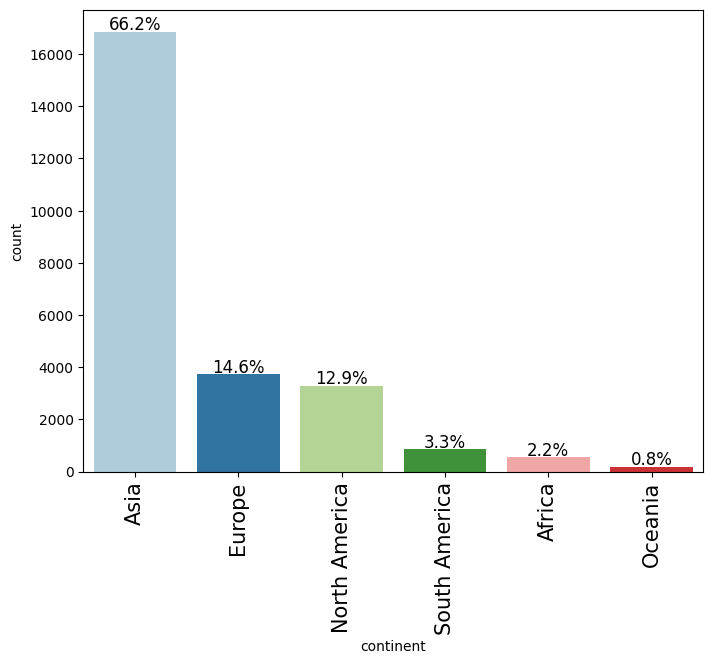

In [46]:
labeled_barplot(data, "continent", perc=True) ## code to create labeled_barplot for continent

## Observation
#### The Asia continent has the highest number of visa applicants with over 66% followed by Europe and North America with 15% and 13% respectively of all applicants. The Oceania has the lowest with 0.8% of the applicants.


## Distribution of the applicants by education of employees

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


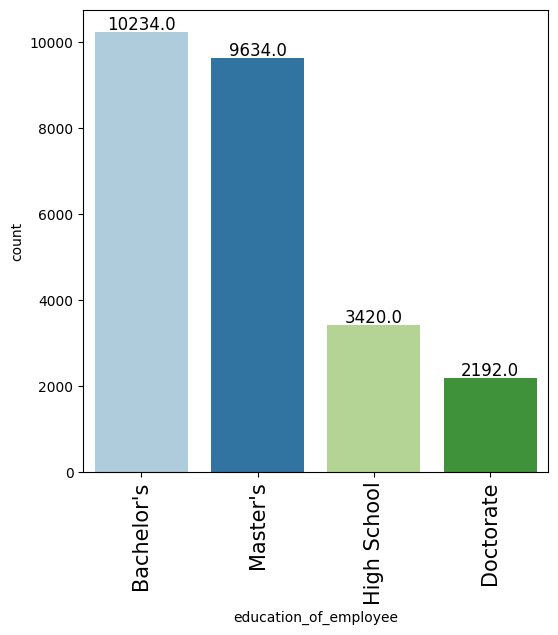

In [48]:
labeled_barplot(df,'education_of_employee')  ## code to create labeled_barplot for education of employee

## Observation
#### Applicants with Bachelors had the highest applications with over 10,000 applications closely followed with those with Masters (close to 10,000 applications). The least application comes with those with Doctorate degree (2192 applications).

## Distribution of the applicants by job_experience

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


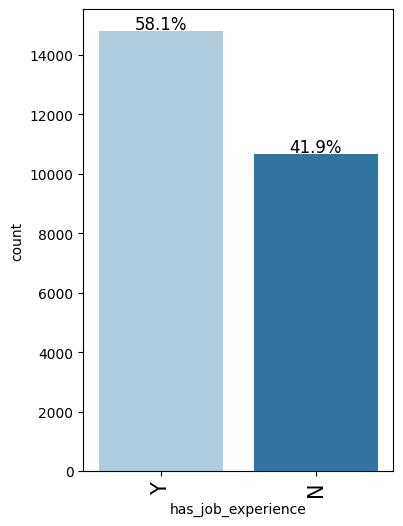

In [49]:
labeled_barplot(df,'has_job_experience',perc=True)  ## code to create labeled_barplot for job experience

## Observation
#### About 58% of applicants have job experience while 42% do not.

## Distribution of the applicants by job_training

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


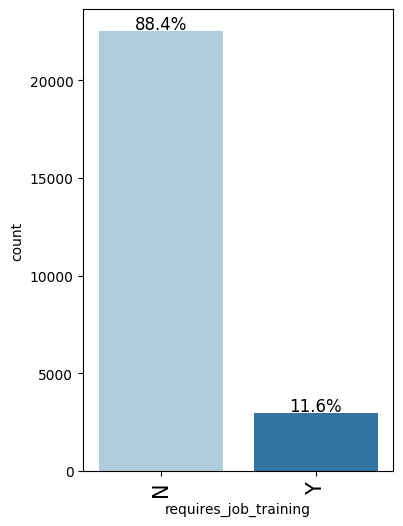

In [50]:
labeled_barplot(df,'requires_job_training', perc = True)  ## code to create labeled_barplot for job training

## Observation
#### About 88.4% of the visa applicants do not require job training while 11.6% would require one form of job training or the other. This also agrees with the previous information obtained where lots of the applicants are experienced, hence do not require job training.

## Distribution of the applicants by region of employment

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


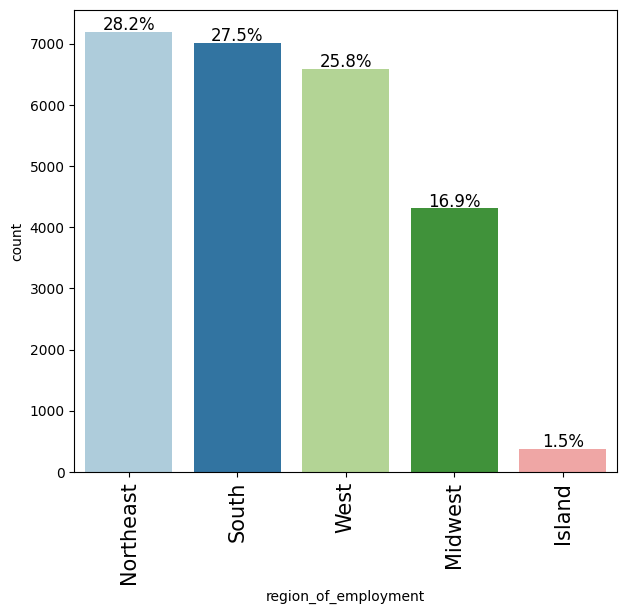

In [51]:
labeled_barplot(df,'region_of_employment', perc = True)  ## code to create labeled_barplot for region of employment

## Observation
#### The Northeast, South and West accounts for the three (3) highest regions where most of the applicants were employed which accounts for 28.2%, 27.5% and 25.8% respectively. This could mean that lots of industries and job opportunities abound in these regions. The Island region accounts for the lowest employment (about 1.5%) maybe due to the lower availability of job opportunities in that region.

## Distribution of the applicants by unit of wage

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


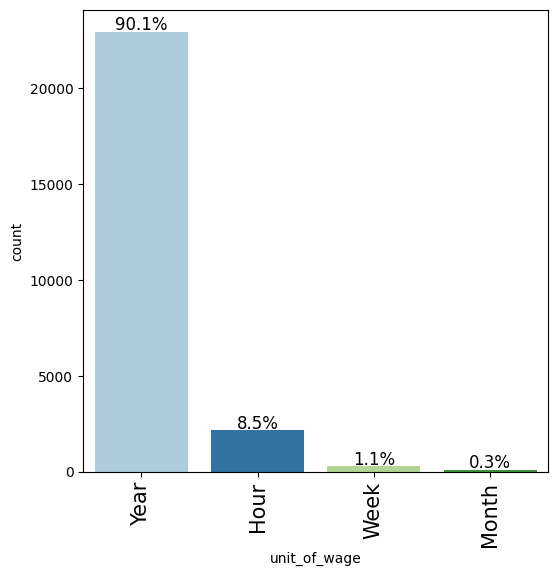

In [52]:
labeled_barplot(df,'unit_of_wage', perc = True)  ##code to create labeled_barplot for unit of wage

## Observation
#### Applicants whose wages are calculated annually (yearly) have the highest number (over 90%) while those on monthly salary accounts for the lowest applicants (0.3%).

## Distribution of the applicants by case status

<ipython-input-45-9d8389d03f9b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


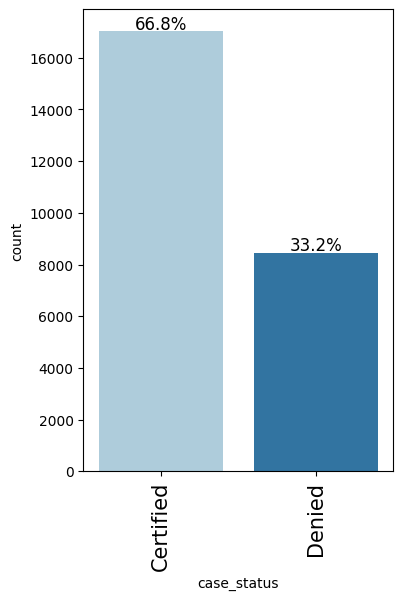

In [53]:
labeled_barplot(df,'case_status', perc = True)  ## code to create labeled_barplot for case status

## Observation
#### About 67% of all applicants were certified while about 33% wee denied.

## Bivariate Analysis

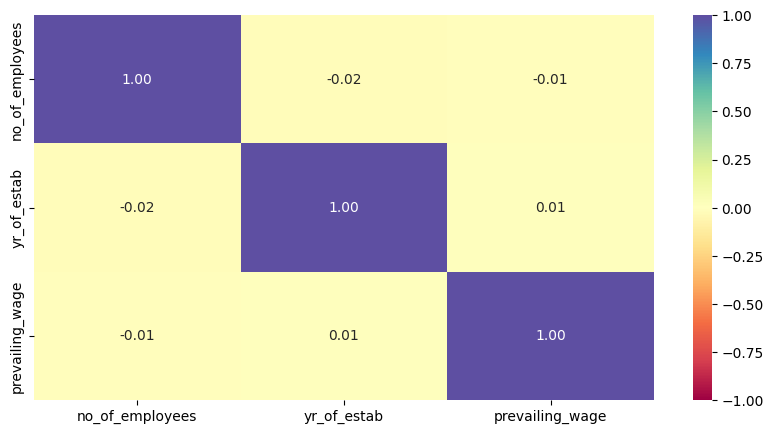

In [58]:
# Creating column list containing numerical variable
cols_list = df.select_dtypes(include = np.number).columns.tolist()
cols_list
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)                             ## code to find the correlation between the variables
plt.show()

## Observation
#### It will be observed that there exist weak correlation between the numerical variables (no_of_employees, yr_of_establishement and prevailing wage).

In [59]:
# Creating functions that will help in further analysis with respect to the target variable
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [60]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Relationship between educational qualification and visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


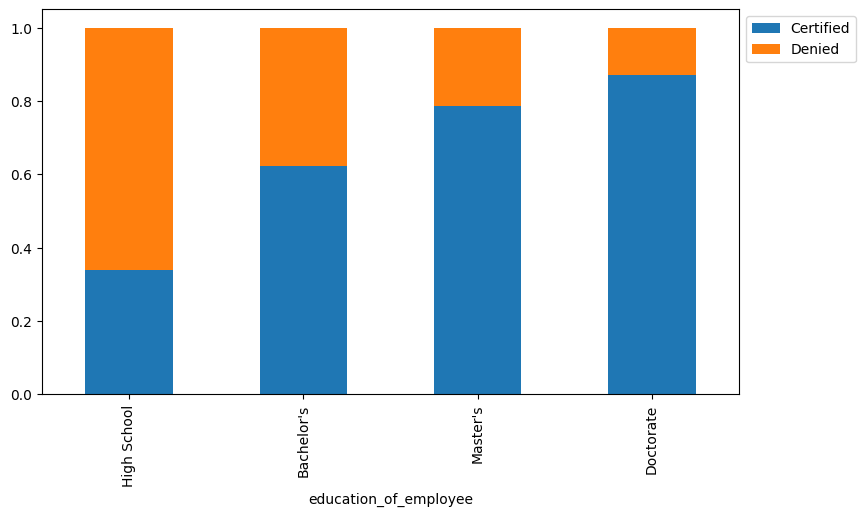

In [62]:
stacked_barplot(df, "education_of_employee", "case_status")

## Observation
#### It appears that there is a direct relationship between the educational qualification and the applications that are certified. For instance, applicants with Doctorate qualification have the highest number of certified applications as against those with only high school who had the lowest certified applications.

## Relationship between the regions and the educational qualification requirement

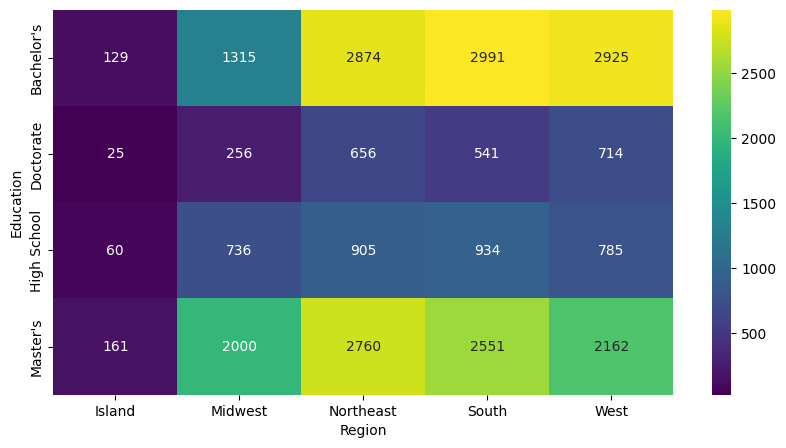

In [63]:
plt.figure(figsize=(10, 5))
sns.heatmap(pd.crosstab(df['education_of_employee'], df['region_of_employment']),
    annot=True,
    fmt="g",
    cmap="viridis"
) ## Complete the code to plot heatmap for the crosstab between education and region of employment

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

## Observation
#### It will be observed that the South region employed the highest number of Bachelor degree holders closely followed by the West and Northeast regions respectively. On the other hand, the Northeat region employed the highest number of applicats with Masters degree closely followed by the South and the West. Interestingly, the West region employed the highest number of applicants with Doctorate degree followed by the Northwest region and then the South region. This could possibly suggest the presence of universities or research institutions in those regions. In all the indices, the Midwest and the Island region had the lowest.

## Relationship between the regions and visa certification

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


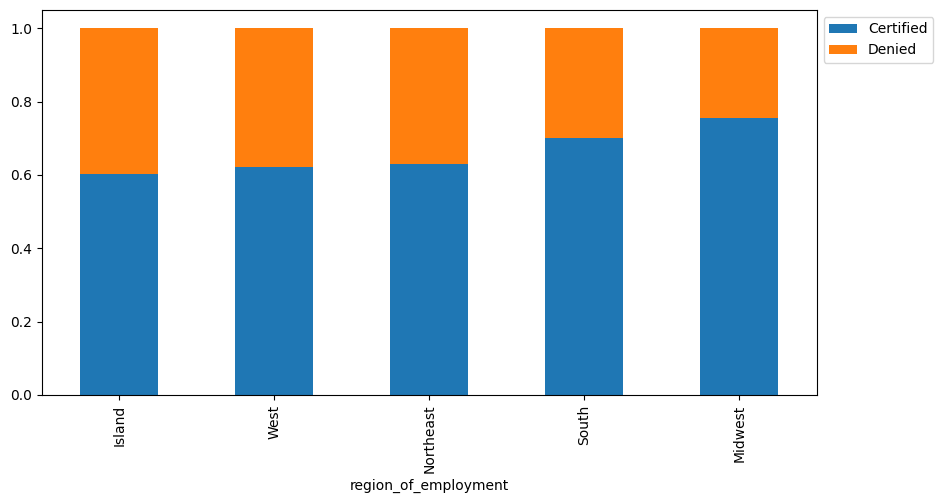

In [64]:
stacked_barplot(df, "region_of_employment", "case_status") ## code to plot stacked barplot for region of employment and case status

## Observation
#### The Midwest region had the highest number of visa certification closely followed by the South region. The remaining regions seem to similar number of visa certification.

## Relationship between the continent and visa certification

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


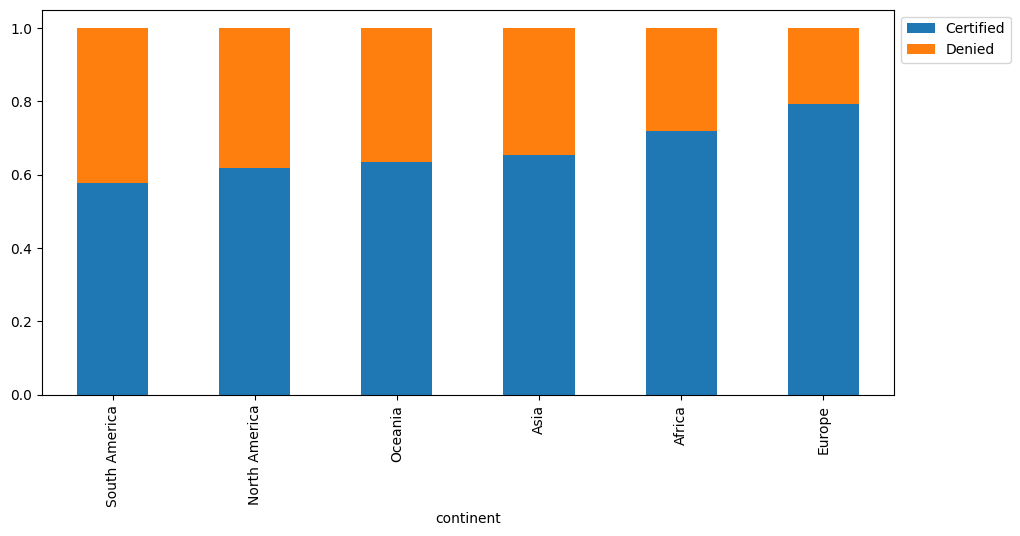

In [65]:
stacked_barplot(df, "continent", "case_status") ## code to plot stacked barplot for continent and case status

## Observation
#### The continent of Europe had the highest visa certification closely followed by Africa and Asia while South America had the least.

## Relationship between work experience and visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


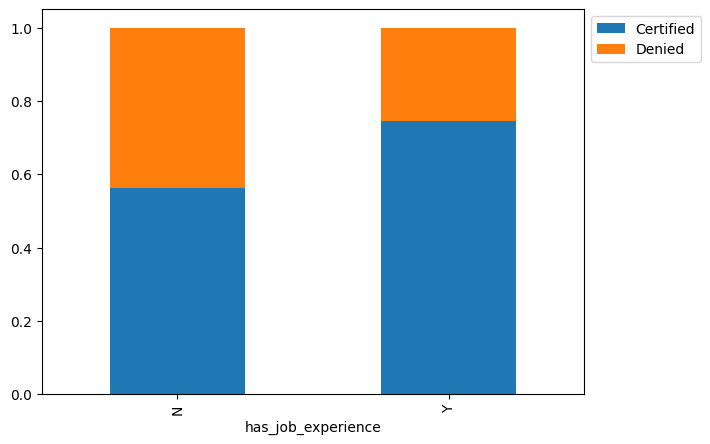

In [66]:
stacked_barplot(df, "has_job_experience", "case_status") ## code to plot stacked barplot for work experience and case status

## Observation
#### Applicants with job experience had the highest visa certification as against those with no experience. There exist a direct relationship between job experience and visa certification.

## Relationship between job experience and job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


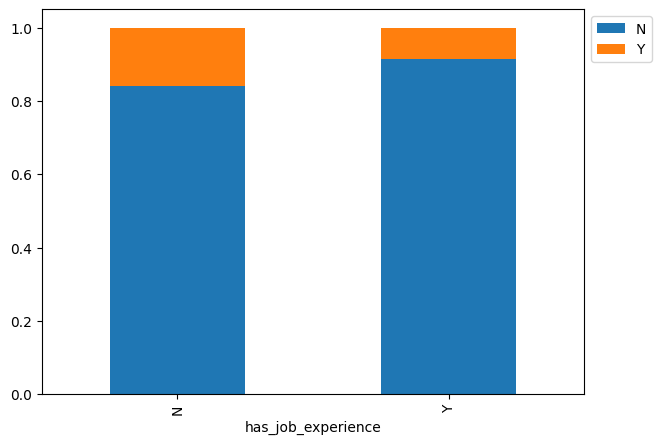

In [67]:
stacked_barplot(df, "has_job_experience", "requires_job_training") ## code to plot stacked barplot for work experience and job training

## Observation
#### It will be noted that applicants with job experience require the least job training while those with no job experience require more job training.

## Relationship between the prevailing wage and the case status

<ipython-input-59-e671a64170a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-59-e671a64170a8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


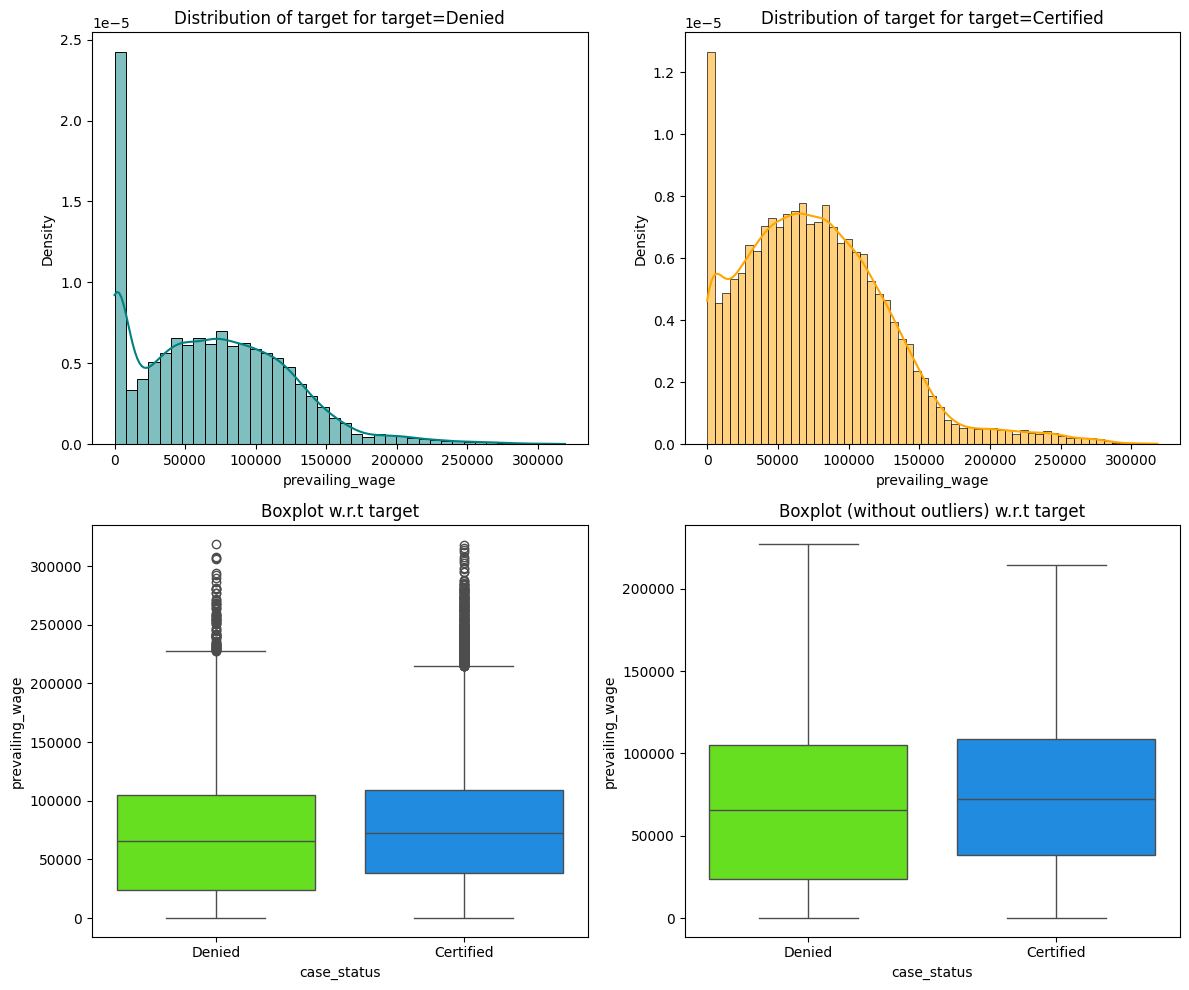

In [68]:
distribution_plot_wrt_target(df,'prevailing_wage','case_status') ##  code to find distribution of prevailing wage and case status

## Observation
#### The shape of the distribution curves for both prevailing wage of applicants with denied case status is similar with those certified case status.However, it appears that applicants with certified case status had higher median prevailing wage compared with those with denied case status.

## Relationship between the prevailing wage and the regions across the US where applications were made.

<ipython-input-59-e671a64170a8>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
<ipython-input-59-e671a64170a8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


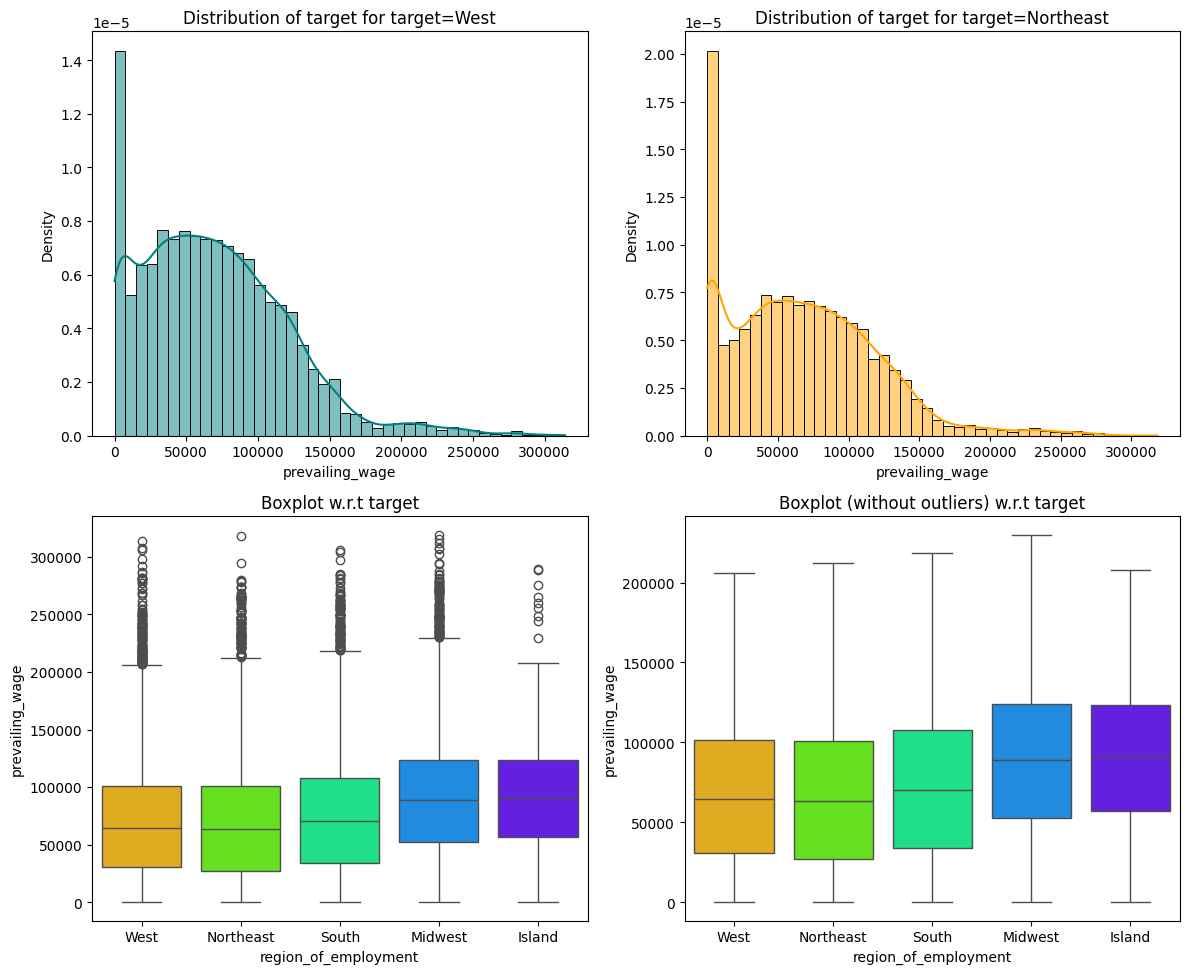

In [72]:
distribution_plot_wrt_target(df,'prevailing_wage','region_of_employment') ##  code to find distribution of prevailing wage and region of employment

## Observation
####It will be observed that the Island and Midwest regions have the highest median prevailing wage closely followed by the South region. The West and Northeast had similar prevailing wage and they are the lowest.

## Relationship between the wage unit and visa case status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


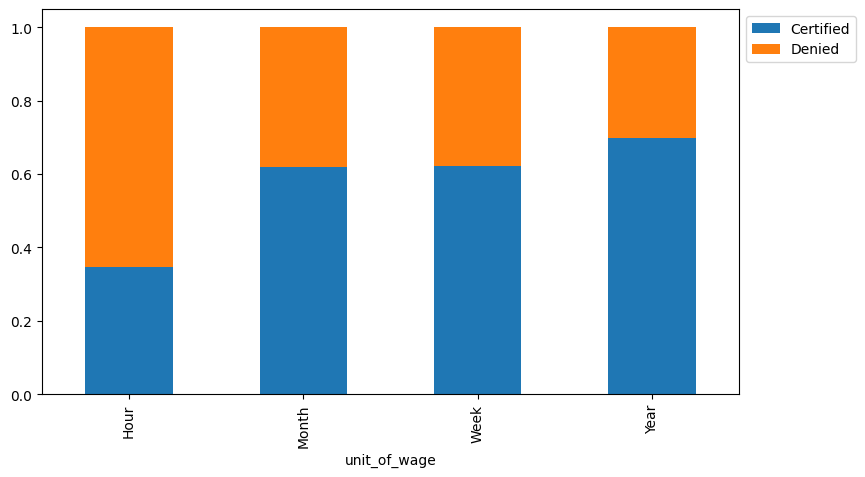

In [73]:
stacked_barplot(df, "unit_of_wage", "case_status") ## code to plot stacked barplot for wage unit and case status

## Observation
#### It will be observed that applicants whose unit of wage is in hours have the lowest certified case status while those whose unit of wage is yearly had the highest certified case status. The certified case status for applicants with Monthly or Weekly wage unit are similar.

## Data Preprocessing

## Outliers checks

['no_of_employees', 'yr_of_estab', 'prevailing_wage']


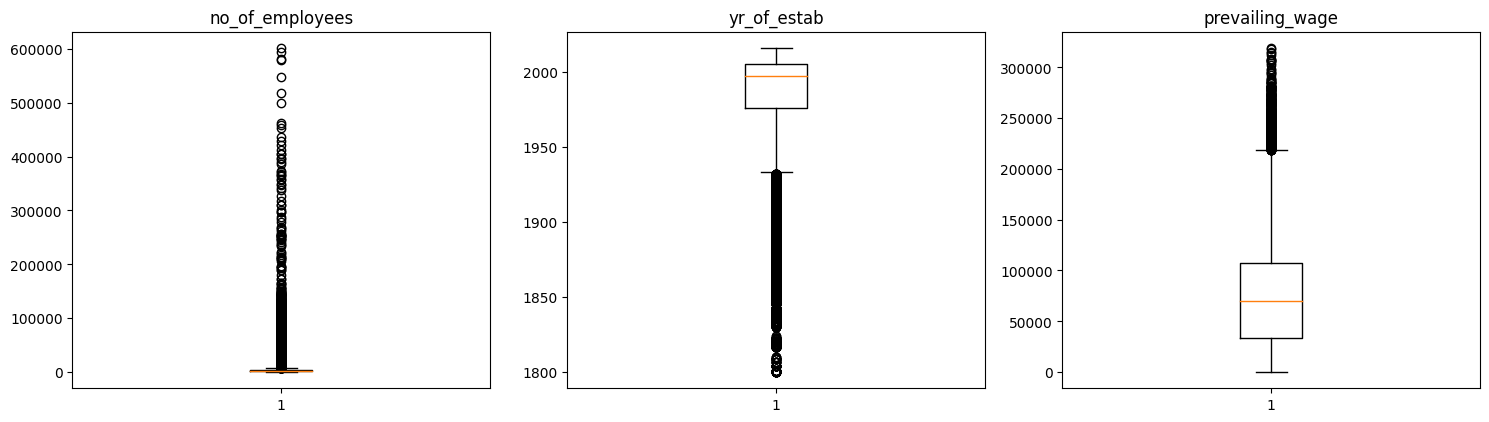

In [79]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print(numeric_columns)


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

## Observation
#### Lots of outliers exist among the numerical data and they all seem be in congruent with the data and therefore they will not be treated.

## Data preparation for modeling


## Encoding of the categorical variables

In [4]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

# separating the data into the target feature and the predictor features

X = df.drop('case_status', axis = 1) # Predictor variables (Independent variable)
y = df['case_status']   # Target variable (dependent variable)


In [5]:
# Creating dummy variables for the predictor variables
X = pd.get_dummies(X,drop_first=True)
X=X.astype(float)

# Splitting the data into training and test data

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)


print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.663602
0    0.336398
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.677917
0    0.322083
Name: proportion, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

#### Since no serious data manipulation in terms of outliers treatment or missing data imputation had been carried out, it would not be necessary to carryout EDA again since almost the same results will be obtained.

## Model Evaluation Criteria

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.


* Both cases are important, therefore `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

In [6]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [7]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model - Model building and hyperparameter tuning

## Decision Tree Model

In [30]:
model_D = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
model_D.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

## Checking performance of the model on the training data

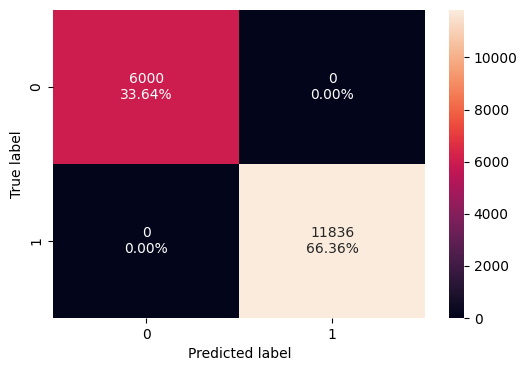

In [31]:
confusion_matrix_sklearn(model_D, X_train, y_train)  # Confusion matrix for the training data

In [73]:
decision_tree_perf_train = model_performance_classification_sklearn(model_D, X_train, y_train) ## code to check performance on train data
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


## Checking performance of the model on the test data

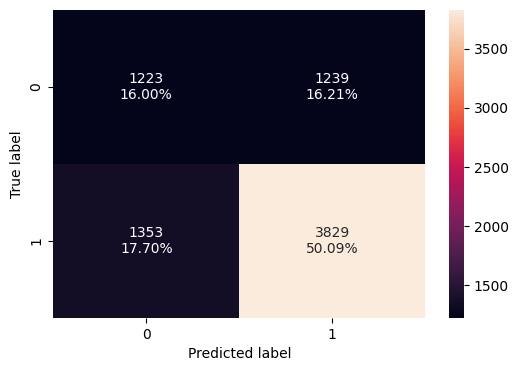

In [15]:
confusion_matrix_sklearn(model_D, X_test, y_test)  # Confusion matrix for the test data

In [74]:
decision_tree_perf_test = model_performance_classification_sklearn(model_D, X_test, y_test) ## code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.660911,0.738904,0.755525,0.747122


## Observation
#### It will be observed that the F1 score of the Decision Tree Model for the training data is 100% while for the test data it is 75% which is clearly the case of overfitting, meaning that the model is not generalizing well. The same reasoning applies to the other metrics.

## Improving the Decision Tree Model by applying weights to reduce the class imbalance in the target variable

In [20]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

case_status
1    0.663602
0    0.336398
Name: proportion, dtype: float64
case_status
1    0.677917
0    0.322083
Name: proportion, dtype: float64


#### Using the with 0.66 for 0 and 0.34 for 1

In [32]:
model_D_w = DecisionTreeClassifier(criterion='gini',class_weight={0:0.66,1:0.34},random_state=1) # code to include class weight
model_D_w.fit(X_train,y_train)  ## code to fit the model

DecisionTreeClassifier(class_weight={0: 0.66, 1: 0.34}, random_state=1)

## Checking the performance of the model on the training data

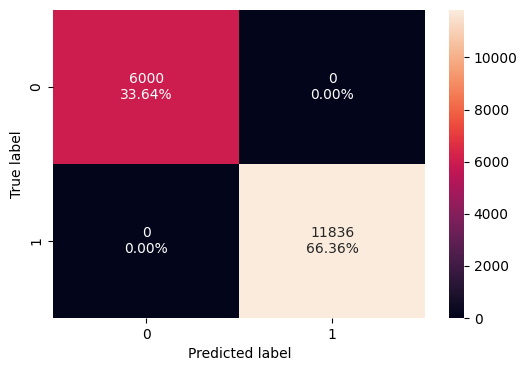

In [23]:
confusion_matrix_sklearn(model_D_w, X_train, y_train)  # Confusion matrix for the training data

In [75]:
decision_tree_perf_train_w = model_performance_classification_sklearn(model_D_w, X_train, y_train) ## code to check performance on train data
decision_tree_perf_train_w

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


## Checking the performance of the model on the test data

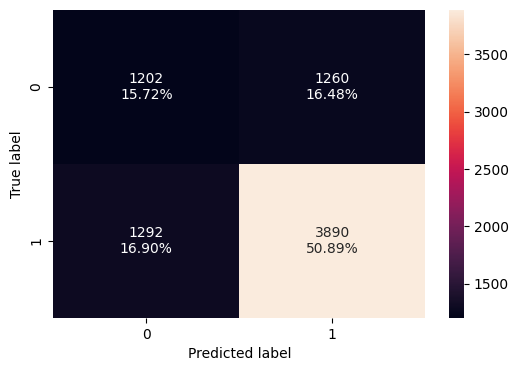

In [25]:
confusion_matrix_sklearn(model_D_w, X_test, y_test)  # Confusion matrix for the test data

In [76]:
decision_tree_perf_test_w = model_performance_classification_sklearn(model_D_w, X_test, y_test) ## code to check performance on train data
decision_tree_perf_test_w

,Accuracy,Recall,Precision,F1
0,0.666143,0.750675,0.75534,0.753


## Observation
#### Incorporating the class weights in the model to reduce class imbalance did not improve in any the performance of the model because the model is still overfitting and also not generalizing well.

## Hyperparameter tuning - Decision Tree

In [33]:
# Choose the type of classifier.
model_D_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2,6),
    "min_samples_leaf": [1,4,7],
    "max_leaf_nodes": [10,15],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj =  GridSearchCV(model_D_estimator, parameters, scoring=scorer) ## code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(X_train, y_train) ## code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
model_D_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_D_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, random_state=1)

## Checking the performance of the tuned Decision Tree Model

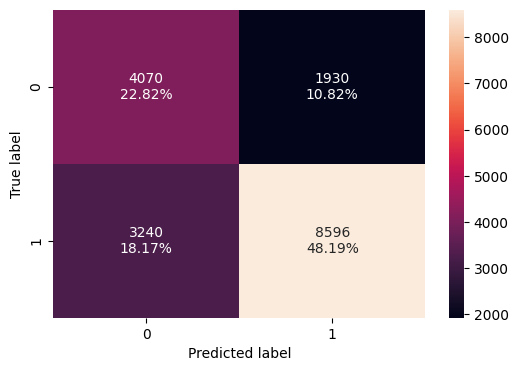

In [51]:
confusion_matrix_sklearn(model_D_estimator, X_train,y_train)  # Checking performance of model on training data

In [77]:
model_D_estimator_model_train_perf = model_performance_classification_sklearn(model_D_estimator, X_train,y_train) ## code to check performance on train data
model_D_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.710137,0.726259,0.816644,0.768804


## Checking the performance of the tuned Decision Tree Model on the test data

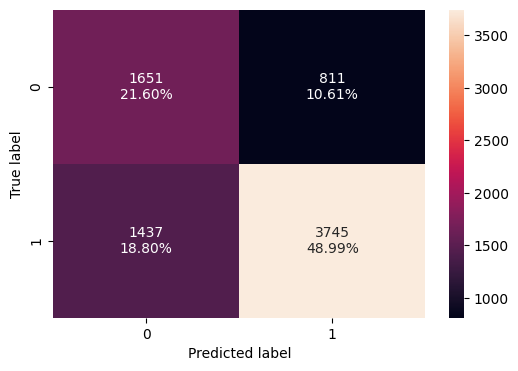

In [53]:
confusion_matrix_sklearn(model_D_estimator, X_test,y_test)  # Checking performance of model on test data

In [78]:
model_D_estimator_model_test_perf = model_performance_classification_sklearn(model_D_estimator, X_test,y_test) ## code to check performance on train data
model_D_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.705913,0.722694,0.821993,0.769152


## Observation
#### Considering the F1 score of 0.7688 of the tuned Decision Tree Model on the training data and also F1 score of 0.769 of the same model on the test data, once can conclude that the model is good, no overfitting and it is generalizing well.

## Building bagging and boosting models

## Bagging- Model building and Hyperparameter Tuning

In [25]:
bagging = BaggingClassifier( random_state = 1) # Code to use the bagging classifier
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

## Checking the performance of the Bagging Classifier on the training data

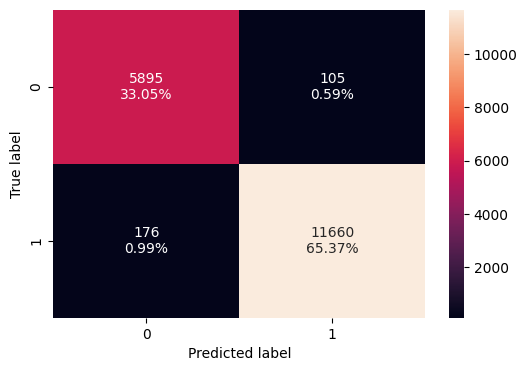

In [44]:
confusion_matrix_sklearn(bagging, X_train,y_train)  # Checking performance of model on training data

In [79]:
bagging_model_train_perf = model_performance_classification_sklearn(bagging, X_train,y_train) ## code to check performance on train data
bagging_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.984245,0.98513,0.991075,0.988094


## Checking the performance of the Bagging Classifier Model on the test data

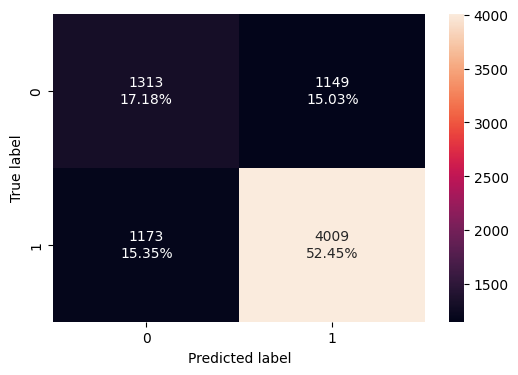

In [47]:
confusion_matrix_sklearn(bagging, X_test,y_test)  # Checking performance of model on test data

In [80]:
bagging_model_test_perf = model_performance_classification_sklearn(bagging, X_test,y_test) ## code to check performance on test data
bagging_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.696232,0.77364,0.777239,0.775435


## Observation
#### The F1 score of the Bagging Classifier Model on the train data is about 0.988 while it is 0.775 on the test data, meaning the model is overfitting and it is not generalizing well.

## Hyperparameter Tuning - Bagging Classifier

In [24]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.8, 0.9,1],
    "max_features": [0.7,0.8,0.9],
    "n_estimators": np.arange(30,50,70),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), parameters, scoring = acc_scorer, cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=30,
                  random_state=1)

## Checking the performance of the tuned Bagging Classifier Model on the train data

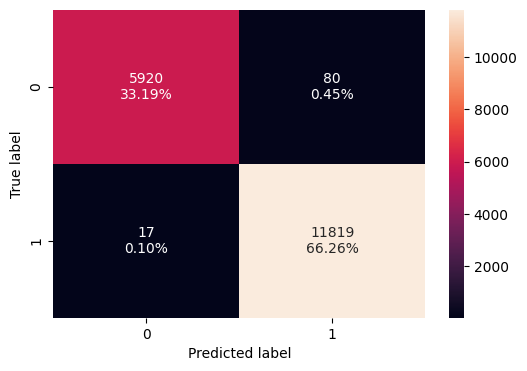

In [61]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [81]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
bagging_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.994562,0.998564,0.993277,0.995913


## Checking the performance of the tuned Bagging Classifier Model on the test data

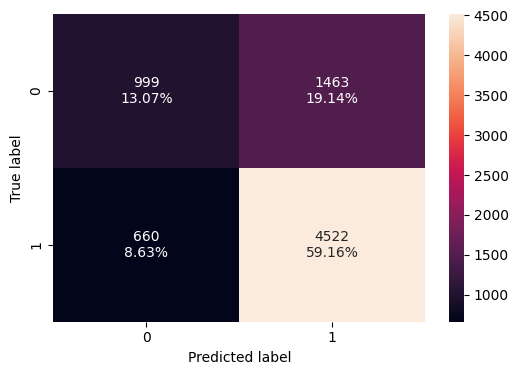

In [63]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)  # code to check the performance of the model on the test data

In [82]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test,y_test)
bagging_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.722266,0.872636,0.755556,0.809886


## Observation
#### The F1 score of the tuned Bagging Classifier Model on the train data is 0.9959 whereas on the test data it is 0.8098 which implies that the model is overfitting and it is generalizing well. It is to be noted that tuning the model did not significantly improve its performance.

## Random Forest

In [23]:
model_rf = RandomForestClassifier(class_weight = 'balanced',random_state=1)   # code to use the RandomForestClassifier to build the model
model_rf.fit(X_train,y_train)  # Code to fit the model to the data

RandomForestClassifier(class_weight='balanced', random_state=1)

## Checking the performance of the Random Forest Classifier Model on the train data

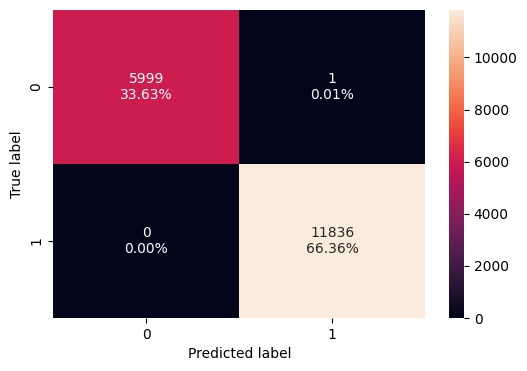

In [71]:
confusion_matrix_sklearn(model_rf, X_train,y_train)  # code to check the performance of the model on train data

In [83]:
model_rf_train_perf=model_performance_classification_sklearn(model_rf, X_train,y_train) ## code to check performance on train data
model_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,1.0,0.999916,0.999958


## Checking the performance of the Random Forest Classifier Model on the test data

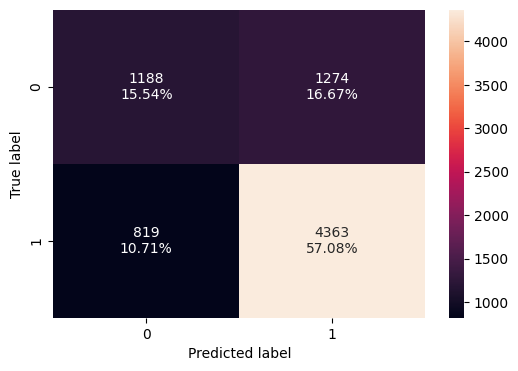

In [73]:
confusion_matrix_sklearn(model_rf, X_test,y_test)  # code to check the performance of the model on test data

In [84]:
model_rf_test_perf=model_performance_classification_sklearn(model_rf, X_test,y_test) ## code to check performance on train data
model_rf_test_perf

,Accuracy,Recall,Precision,F1
0,0.72619,0.841953,0.773993,0.806544


## Observation
#### The F1 score of the Random Forest Classifier Model is about 1.0 on the train data whereas it is 0.8065 on the test data which implies that the model is overfitting and not generalizing well.

## Hyperparameter Tuning - Random Forest Classifier

In [22]:
# Choose the type of classifier.
model_rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_rf_tuned, parameters, scoring=acc_scorer,cv=5) ##  code to run grid search with cv = 5 and n_jobs = -1
grid_obj = grid_obj.fit(X_train, y_train) ## code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
model_rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=30,
                       oob_score=True, random_state=1)

## Checking the performance of the tuned Random Forest Classifier Model on the train data

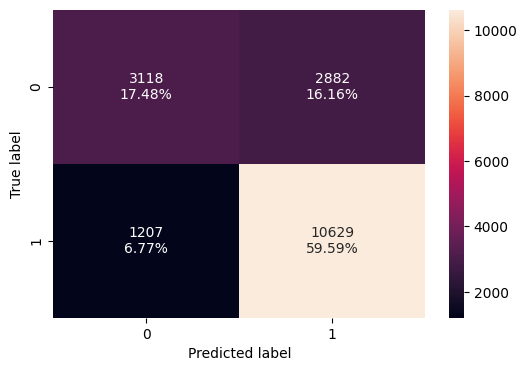

In [82]:
confusion_matrix_sklearn(model_rf_tuned, X_train,y_train)  #code to test the model on the train data

In [85]:
model_rf_tuned_train_perf=model_performance_classification_sklearn(model_rf, X_train,y_train) ## code to check performance on train data
model_rf_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,1.0,0.999916,0.999958


## Checking the performance of the tuned Random Forest Model on the test data

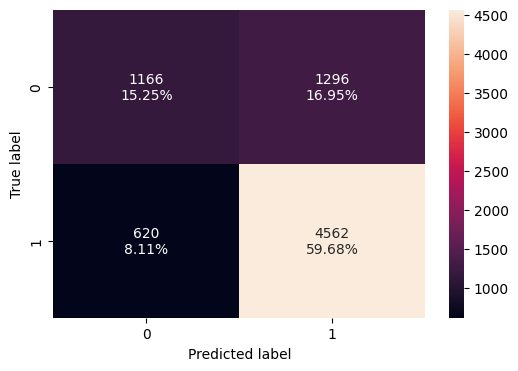

In [84]:
confusion_matrix_sklearn(model_rf_tuned, X_test,y_test)  #code to test the model on the test data

In [86]:
model_rf_tuned_test_perf=model_performance_classification_sklearn(model_rf, X_test,y_test) ## code to check performance on test data
model_rf_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.72619,0.841953,0.773993,0.806544


## Observation
#### Tuning the hyperparameter of the Random Forest model did not yield significant improvement in the model performance compared with the untuned mode since the F1 score of the train and test data are similar in both cases and the model is still overfitting and not generalizing well.

## Boosting - Model building and Hyperparameter Tuning

## Adaboost Classifier

In [21]:
ad_boost=AdaBoostClassifier(random_state=1) # code to build the adaboost model
ad_boost.fit(X_train,y_train)   # code to fit the train data to the model

AdaBoostClassifier(random_state=1)

## Checking the performance of the Adaboost Classifier Model on the train data

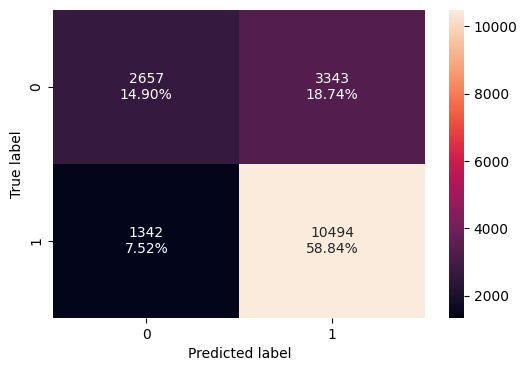

In [93]:
confusion_matrix_sklearn(ad_boost, X_train,y_train)  #code to train the model on the train data

In [87]:
ad_boost_train=model_performance_classification_sklearn(ad_boost, X_train,y_train) ## code to check performance on train data
ad_boost_train

,Accuracy,Recall,Precision,F1
0,0.737329,0.886617,0.758401,0.817513


## Checking the performance of the Adaboost Classifier on the test data

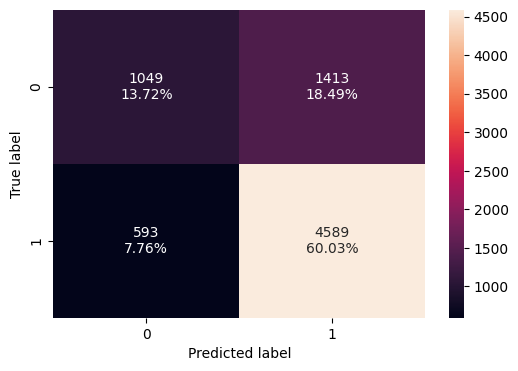

In [91]:
confusion_matrix_sklearn(ad_boost, X_test,y_test)  #code to check the performance of the model on the test data

In [88]:
ad_boost_test=model_performance_classification_sklearn(ad_boost, X_test,y_test) ## code to check performance on test data
ad_boost_test

,Accuracy,Recall,Precision,F1
0,0.737572,0.885565,0.764578,0.820637


## Observation
#### The F1 score of the AdaBoost Classifier Model on the training data is 0.8175 while on the test data it was 0,8206 and since the values are very close, it means the model is not overfitting and it is generalizing well.

## Hyperparameter Tuning - AdaBoost Classifier



In [20]:
# Choose the type of classifier.
ad_boost_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(ad_boost_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ad_boost_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ad_boost_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

## Checking the performance of the tuned AdaBoost Classifier on the train data

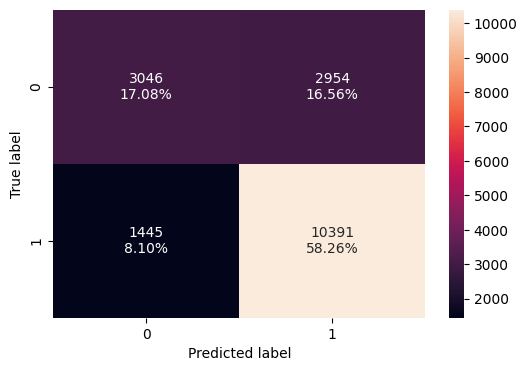

In [101]:
confusion_matrix_sklearn(ad_boost_tuned, X_train,y_train)  #code to check the performance of the model on the train data

In [89]:
ad_boost_model_train_perf=model_performance_classification_sklearn(ad_boost_tuned, X_train,y_train) ## code to check performance on train data
ad_boost_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.753364,0.877915,0.778644,0.825305


## Checking the performance of the tuned AdaBoost Classifier Model on the test data

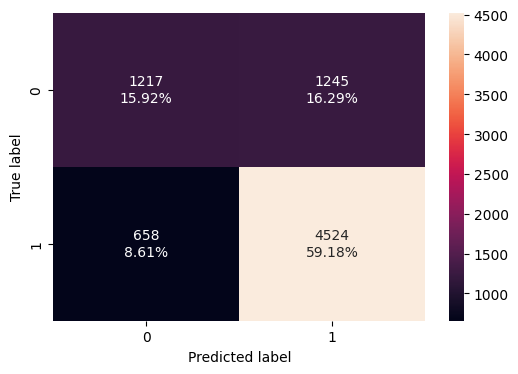

In [102]:
confusion_matrix_sklearn(ad_boost_tuned, X_test,y_test)  #code to check the performance of the model on the test data

In [90]:
ad_boost_model_test_perf=model_performance_classification_sklearn(ad_boost_tuned, X_test,y_test) ## code to check performance on test data
ad_boost_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.751047,0.873022,0.784191,0.826226


## Observation
#### The performance of the tuned AdaBoost Classifier model was slightly improved as the F1 score of the train data marginally increased to 0.8253 (from 0.8175) while on the test data, it marginally increased to 0.8262 (from 0.8206). Since the values are close, it implies the model is not overfitting and it is also generalizing well.

## Gradient Boosting Classifier - Model Building and Hyperparameter Tuning

In [8]:
gb_model=GradientBoostingClassifier(random_state=1)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

## Checking the performance of the Gradient Boost Classifier Model on the train data

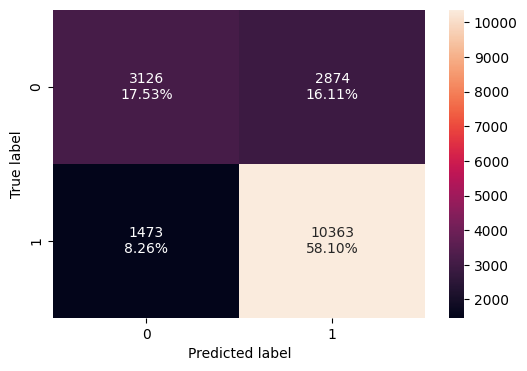

In [105]:
confusion_matrix_sklearn(gb_model, X_train,y_train)  #code to check the performance of the model on the train data

In [9]:
gb_model_train_perf=model_performance_classification_sklearn(gb_model, X_train,y_train) ## code to check performance on train data
gb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.756279,0.875549,0.782881,0.826626


## Checking the performance of the Gradient Boost Classifier Model on the test data

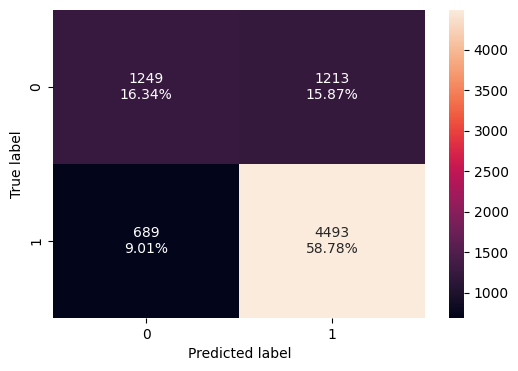

In [108]:
confusion_matrix_sklearn(gb_model, X_test,y_test)  #code to check the performance of the model on the test data

In [10]:
gb_model_test_perf=model_performance_classification_sklearn(gb_model, X_test,y_test) ## code to check performance on test data
gb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.751177,0.86704,0.787417,0.825312


## Observation
#### The F1 score of the Gradient Boost Classifier Model on the train data is 0.8266 while on the test data it is 0.8253. Since the values are very close, it means the model is not overfitting and it also generalizing well.

## Hyperparameter Tuning - Gradient Boost Classifier

In [11]:
# Choose the type of classifier.
model_gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
model_gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.8,
                           n_estimators=75, random_state=1, subsample=0.7)

## Checking the performance of the Tuned Gradient Boost Classifier Model on the training data

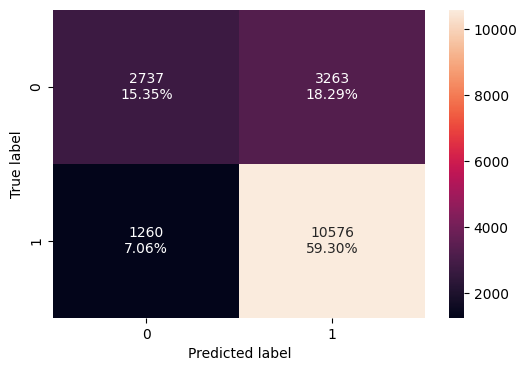

In [14]:
confusion_matrix_sklearn(model_gbc_tuned, X_train,y_train)  #code to check the performance of the model on the train data

In [12]:
model_gbc_tuned_train_perf=model_performance_classification_sklearn(model_gbc_tuned, X_train,y_train) ## code to check performance on train data
model_gbc_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.746412,0.893545,0.764217,0.823836


## Checking the performance of the Tune Gradient Boost Classifier Model on the test data

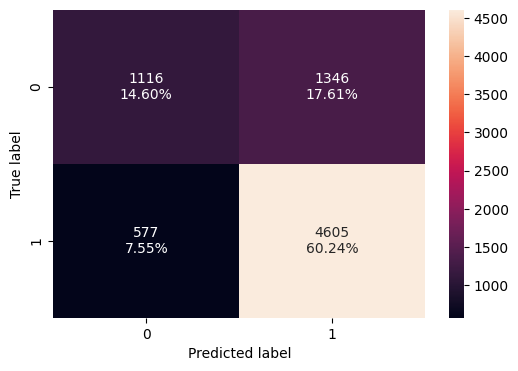

In [13]:
confusion_matrix_sklearn(model_gbc_tuned, X_test,y_test)  #code to check the performance of the model on the test data

In [13]:
model_gbc_tuned_test_perf=model_performance_classification_sklearn(model_gbc_tuned, X_test,y_test) ## code to check performance on test data
model_gbc_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.74843,0.888653,0.77382,0.82727


## Observation
#### The F1 score of the tuned Gradient Boost Classifier model on the training data was 0.8238 while on the test data, it was 0.8273. Since the two values are quite close, the model is not overfitting and therefore it is generalising well. Also on comparing the F1 score of the tuned and un-tuned Gradient Boost Classifier Models, it will be observed that tuning only marginally improved the performance of the model and the increase in model performance may or may not justify the additional cost of computing resources used in the tuning.

## XG-Boost Classifier - Model building and Hyperparameter Tuning

In [19]:
model_xgb=XGBClassifier(random_state=1, verbosity = 0)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

## Checking the performance of the XG-Boost Classifier Model on the training data


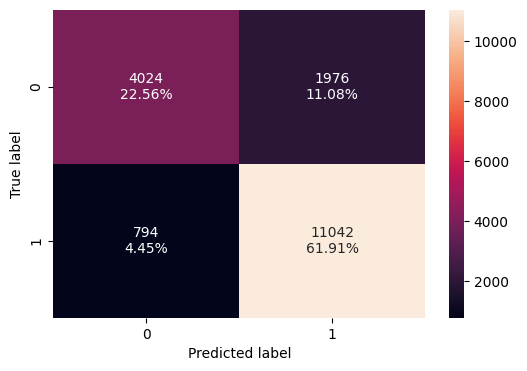

In [20]:
confusion_matrix_sklearn(model_xgb, X_train,y_train)  #code to check the performance of the model on the train data

In [95]:
model_xgb_train_perf=model_performance_classification_sklearn(model_xgb, X_train,y_train) ## code to check performance on train data
model_xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.844696,0.932917,0.84821,0.888549


## Checking the performance of the XG-Boost Classifier Model on the test data

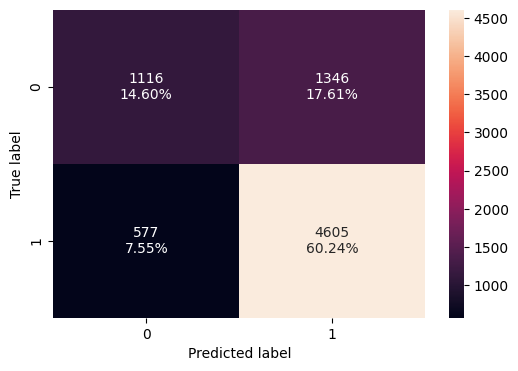

In [22]:
confusion_matrix_sklearn(model_gbc_tuned, X_test,y_test)  #code to check the performance of the model on the test data

In [96]:
model_xgb_test_perf=model_performance_classification_sklearn(model_xgb, X_test,y_test) ## code to check performance on test data
model_xgb_test_perf

,Accuracy,Recall,Precision,F1
0,0.731423,0.853146,0.773849,0.811565


## Observation
#### It will be observed that the F1 score of the XG-Boost Classifier Model on the training data (0.8885) and on the test data (0.8116) are not very close, hence the model is overfitting and is not generalizing well on new data.

## Hyperparameter Tuning of the XG-Boost Classifer Model

In [18]:
# Choose the type of classifier.
model_xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(model_xgb_tuned, parameters, scoring=acc_scorer,cv=5) # Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(X_train, y_train)  #code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
model_xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
model_xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=75,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

## Checking the performance of the tuned XG-Boost Classifier model on the training data

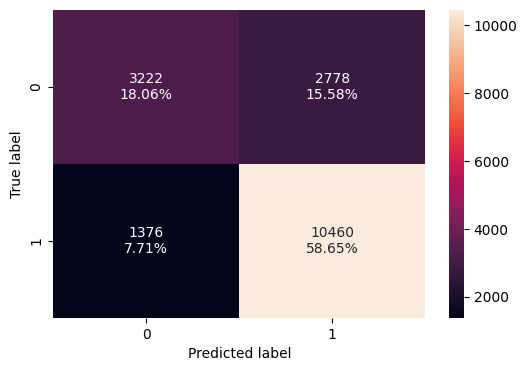

In [26]:
confusion_matrix_sklearn(model_xgb_tuned, X_train,y_train)  #code to check the performance of the model on the train data

In [97]:
model_xgb_tuned_train_perf=model_performance_classification_sklearn(model_xgb_tuned, X_train,y_train) ## code to check performance on train data
model_xgb_tuned_train_perf

,Accuracy,Recall,Precision,F1
0,0.7671,0.883745,0.79015,0.83433


## Checking the performance of the tuned XG-Boost Classifier model on the test data

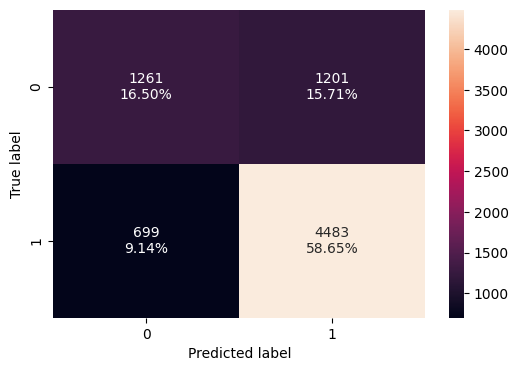

In [28]:
confusion_matrix_sklearn(model_xgb_tuned, X_test,y_test)  #code to check the performance of the model on the test data

In [98]:
model_xgb_tuned_test_perf=model_performance_classification_sklearn(model_xgb_tuned, X_test,y_test) ## code to check performance on test data
model_xgb_tuned_test_perf

,Accuracy,Recall,Precision,F1
0,0.751439,0.86511,0.788705,0.825143


## Observation
#### The F1 score of the tuned XG-Boost Classifier Model on training data was 0.8343 while on the test data, the value was 0.8251. These two values are very close, hence the model is not overfitting and it can be said to be generalizing well on new data. Also there was a marginal improvement on the performance of the tuned XG-Boost Classifier Model compared to the un-tuned model.

## Stacking Classifier

In [27]:
estimators = [
    ("AdaBoost", ad_boost),
    ("Gradient Boosting", model_gbc_tuned),
    ("Random Forest", model_rf_tuned),
]

final_estimator = model_xgb_tuned
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)  # code to define Stacking Classifier
stacking_estimator.fit(X_train,y_train)  # code to fit Stacking Classifier on the train data



StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           learning_rate=0.05,
                                                           max_features=0.8,
                                                           n_estimators=75,
                                                           random_state=1,
                                                           subsample=0.7)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=5,
                                                       n_estimators=30,
                                                       oob_scor...
                                                 feature_types=None, gamma=1,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=75, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

## Checking the performance of the Stacking Classifier Model on the training data

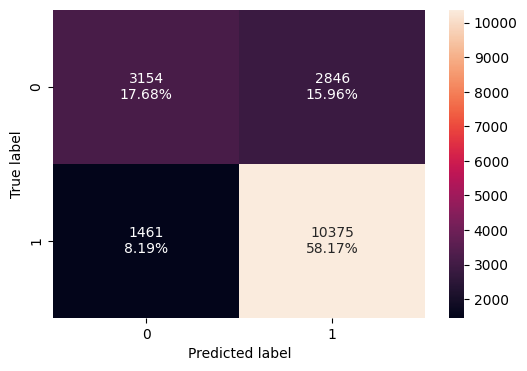

In [43]:
confusion_matrix_sklearn(stacking_estimator, X_train,y_train)  #code to check the performance of the model on the train data

In [99]:
stacking_estimator_train_perf=model_performance_classification_sklearn(stacking_estimator, X_train,y_train) ## code to check performance on train data
stacking_estimator_train_perf

,Accuracy,Recall,Precision,F1
0,0.758522,0.876563,0.784736,0.828112


## Checking the performance of the Stacking Classifier model on the test data

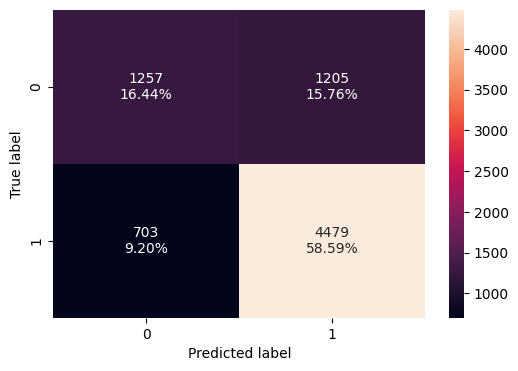

In [45]:
confusion_matrix_sklearn(stacking_estimator, X_test,y_test)  #code to check the performance of the model on the test data

In [100]:
stacking_estimator_test_perf=model_performance_classification_sklearn(stacking_estimator, X_test,y_test) ## code to check performance on test data
stacking_estimator_test_perf

,Accuracy,Recall,Precision,F1
0,0.750392,0.864338,0.788001,0.824406


## Observation
#### The F1 score of the Stacking Classifier Model on the training and test data are 0.8281 and 0.8244. Since the values are close to each other, it means the model is not overfitting and its generalizing well also on new data.

## Model Performance Comparison and Final Model Selection

In [114]:
models_train_comp_df = pd.concat([decision_tree_perf_train.T,decision_tree_perf_train_w.T,model_D_estimator_model_train_perf.T, bagging_model_train_perf.T,bagging_estimator_model_train_perf.T,model_rf_train_perf.T, model_rf_tuned_train_perf.T,ad_boost_train.T,ad_boost_model_train_perf.T,
    gb_model_train_perf.T,model_gbc_tuned_train_perf.T,model_xgb_train_perf.T,
    model_xgb_tuned_train_perf.T,stacking_estimator_train_perf.T],axis=1)
models_train_comp_df.columns = ["Decision Tree","Decision Tree with class weight","Tuned Decision Tree","Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest","Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",]
print("Training performance comparison:")
models_train_comp_df



Training performance comparison:


,Decision Tree,Decision Tree with class weight,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.710137,0.984245,0.994562,0.999944,0.999944,0.737329,0.753364,0.756279,0.746412,0.844696,0.767100,0.758522
Recall,1.0,1.0,0.726259,0.985130,0.998564,1.000000,1.000000,0.886617,0.877915,0.875549,0.893545,0.932917,0.883745,0.876563
Precision,1.0,1.0,0.816644,0.991075,0.993277,0.999916,0.999916,0.758401,0.778644,0.782881,0.764217,0.848210,0.790150,0.784736
F1,1.0,1.0,0.768804,0.988094,0.995913,0.999958,0.999958,0.817513,0.825305,0.826626,0.823836,0.888549,0.834330,0.828112


In [113]:
models_test_comp_df = pd.concat([decision_tree_perf_test.T,decision_tree_perf_test_w.T,model_D_estimator_model_test_perf.T, bagging_model_test_perf.T,bagging_estimator_model_test_perf.T,model_rf_test_perf.T, model_rf_tuned_test_perf.T,ad_boost_test.T,ad_boost_model_test_perf.T,
    gb_model_test_perf.T,model_gbc_tuned_test_perf.T,model_xgb_test_perf.T,
    model_xgb_tuned_test_perf.T,stacking_estimator_test_perf.T],axis=1)
models_test_comp_df.columns = ["Decision Tree","Decision Tree with class weight","Tuned Decision Tree","Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest","Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Decision Tree with class weight,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660911,0.666143,0.705913,0.696232,0.722266,0.726190,0.726190,0.737572,0.751047,0.751177,0.748430,0.731423,0.751439,0.750392
Recall,0.738904,0.750675,0.722694,0.773640,0.872636,0.841953,0.841953,0.885565,0.873022,0.867040,0.888653,0.853146,0.865110,0.864338
Precision,0.755525,0.755340,0.821993,0.777239,0.755556,0.773993,0.773993,0.764578,0.784191,0.787417,0.773820,0.773849,0.788705,0.788001
F1,0.747122,0.753000,0.769152,0.775435,0.809886,0.806544,0.806544,0.820637,0.826226,0.825312,0.827270,0.811565,0.825143,0.824406


## Model selection and elimination based on performance

#### The first criterion to use to eliminate among the models is classical case of overfitting where there is significant difference between the F1 score of the model on both the training data and the test data. On that note, the following classifiers or models will be eliminated.
- Decision Tree
- Decision Tree with class weights
- Bagging
- Bagging Tuned
- Random Forest
- Random Forest Tuned
- XG-Boost

#### The next criterion is to use low F1 score of the model in both the training and test data. On that note, the following models will be eliminated.
- Decision Tree Tuned
- AdaBoost

#### The remaining models - Ada-Boost Tuned,Gradient Boost, Gradient Boost Tuned, XG_Boost Tuned and Stacking all have good performances with similar metrics. However, in order to select one among them with the best performance, Gradient Boost Classifier Tuned will be selected since it gave the best F1 score on the test data though very marginal.

## Important features of the final model

#### The final model selected is the tuned Gradient Boost Classifier model with F1 score of 0.8238 and 0.8273 on the training and test data respectively

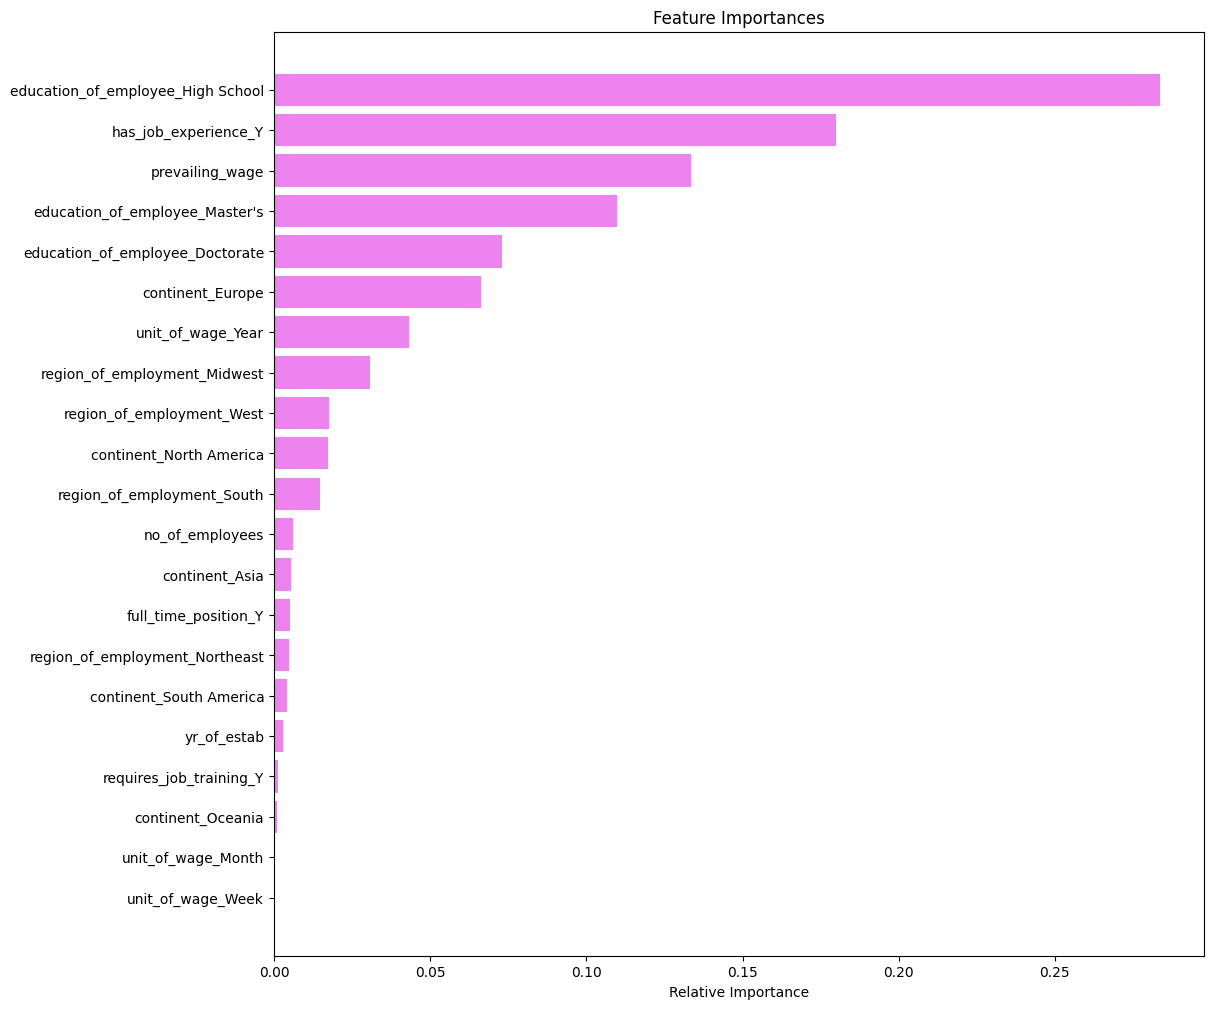

In [15]:
feature_names = X_train.columns
importances = model_gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Observation
#### The top 5 important features of the tuned Gradient Boost Classifier model are the education_of_employee_high_school, those with job experience, prevailing wage, education_of_employee_Masters and education_of_employee_Doctorate.

## Actionable Insights and Recommendations

#### The Gradient Boost Classifier Model with tuned parameters was selected to be the best model because it provided better performance on both the training and test data and it was found not to overfit the data and was also generalizing well on new data.

#### The important features identified by the model to greatly impact the prediction of applicants whose case status will be certified or denied includes the High school education qualification of applicants, job experience of applicants,the prevailing wage etc. Therefore, in order to hasten the processing of the visa, the applicants can be screened based on the parameters mentioned above.

#### It appears that there is a direct relationship between the educational qualification and the applications that are certified. For instance, applicants with Doctorate qualification have the highest number of certified applications as against those with only high school who had the lowest certified applications.

#### Applicants with job experience had the highest certified case status as against those with no experience. There exist a direct relationship between job experience and case status certification.

#### There appears also a direct relationship between the median prevailing wage and case status certification. For instance, a significant number of applicants with certified case status usually have a higher median prevailing wage compared to applicants with denied case status.
